# Milestone 2 - Hypothesis Simulation 

## Author - Lawrence Huang



## Instructions
For Milestone 2 you should

1. explore the dataset supported by charts and summary statistics;
2. identify a likely distribution for several of the features;
3. compute basic summary statistics by both classical, bootstrap, and Bayesian methods;
4. compute confidence intervals for the above summary statistics by classical, bootstrap, and Bayesian methods; and
5. leverage confidence intervals in performing hypothesis tests to determine if the differences in pairs and multiple populations are significant.

#### Dataset: King County Housing dataset
#### Location for dataset: https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/kc_house_data.csv

#### Overall problem statement:  Predict the price of a house in King County.
Use case: A developer interested in acquiring properties in King County, Washington is interested in what home features (zip code, structure, etc) would yield a high price. 

#### Goal for Milestone 2: Explore several of the features and perform hypothesis testing

In [1]:
# Load necessary libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import scipy.stats as ss
from sklearn.preprocessing import scale
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.stats.weightstats as ws

# Load data
url = 'https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/kc_house_data.csv'
house = pd.read_csv(url)

### 1. explore the dataset supported by charts and summary statistics 
Milestone 1 was dedicated to exploratory data analysis; multiple chart types and aesthetics, as well as summary statistics, were used to visually explore different aspects of the dataset.<p>
Here, the dataset was explored in the context of hypothesis testing, and charts and summary statistics were used throughout the subsequent sections.

##### Determine whether variables are numeric or categorical

In [2]:
# Determine whether variables are numeric or categorical
print('data type:')
print(house.dtypes)
print('\n')
print('unique levels:')
print(house.nunique())

data type:
id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


unique levels:
id               21436
date               372
price             4028
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               

##### Observations:
<ul>
<li>waterfront, view, condition, grade are categorical because they have a small number of discrete numeric values and are qualitative.</li>
<li>zipcode is fundamentally categorical.</li>
    <li>bedrooms (and bathrooms and in particular floors) could be treated as numerical (because math operations, e.g. addition, are possible), but could also be categorical given the relatively small numbers of discrete values</li>
</ul>

##### Summary statistics

In [3]:
# Overview of summary statistics including mean, standard deviation, and quartiles
house.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


##### Plot histograms of several variables

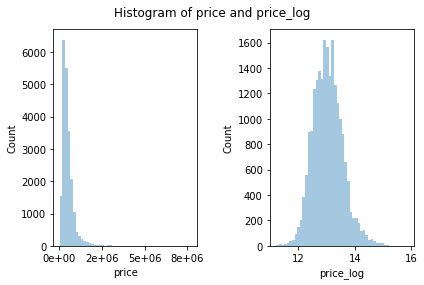

In [4]:
# price is positively-skewed with a long right tail; 
# a log transform may create a distribution closer to a normal distribution.
house['price_log'] = np.log(house['price'])

# plot histograms before and after log transform
fig, axs = plt.subplots(1,2)
sns.distplot(house['price'], kde=False, ax=axs[0])
axs[0].xaxis.set_major_formatter(mtick.FormatStrFormatter('%.0e'))
sns.distplot(house['price_log'], kde=False, ax=axs[1])
axs[0].set_ylabel('Count')
axs[1].set_ylabel('Count')
fig.tight_layout()
fig.subplots_adjust(top=0.9)
plt.suptitle('Histogram of price and price_log')
plt.show()

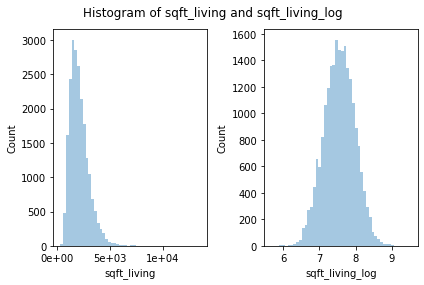

In [5]:
# sqft_living is positively-skewed with a long right tail; 
# a log transform may create a distribution closer to a normal distribution.
house['sqft_living_log'] = np.log(house['sqft_living'])

# plot histograms before and after log transform
fig, axs = plt.subplots(1,2)
sns.distplot(house['sqft_living'], kde=False, ax=axs[0])
axs[0].xaxis.set_major_formatter(mtick.FormatStrFormatter('%.0e'))
sns.distplot(house['sqft_living_log'], kde=False, ax=axs[1])
axs[0].set_ylabel('Count')
axs[1].set_ylabel('Count')
fig.tight_layout()
fig.subplots_adjust(top=0.9)
plt.suptitle('Histogram of sqft_living and sqft_living_log')
plt.show()

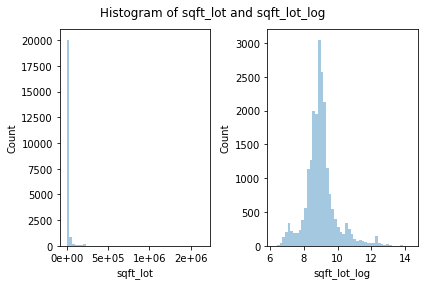

In [6]:
# sqft_lot is positively-skewed with a long right tail; 
# try a log transform to see how the distribution changes (still does not look close to normal)
house['sqft_lot_log'] = np.log(house['sqft_lot'])

# plot histograms before and after log transform
fig, axs = plt.subplots(1,2)
sns.distplot(house['sqft_lot'], kde=False, ax=axs[0])
axs[0].xaxis.set_major_formatter(mtick.FormatStrFormatter('%.0e'))
sns.distplot(house['sqft_lot_log'], kde=False, ax=axs[1])
axs[0].set_ylabel('Count')
axs[1].set_ylabel('Count')
fig.tight_layout()
fig.subplots_adjust(top=0.9)
plt.suptitle('Histogram of sqft_lot and sqft_lot_log')
plt.show()

### 2. identify a likely distribution for several of the features
Features tested: price (treated as a feature for this exercise), sqft_living, sqft_above, yr_built, long<br>
Method: Kolmogorov-Smirnov test

In [7]:
# plot cumulative distribution function (CDF) of the sample and the CDF of the theoretical distribution to test
def plot_cums(dist1, dist2, label1, label2):
    # sort the first data sample:
    data_sorted = np.sort(dist1)
    # calculate the proportional values of samples
    p = 1. * np.arange(len(dist1)) / (len(dist1) - 1)

    # Now plot as line and scatter plot. 
    plt.plot(data_sorted, p)
    plt.scatter(data_sorted, p, color = 'red', label=label1)
    
    # sort the seond data sample:
    data_sorted = np.sort(dist2)
    
    # And the second plot
    plt.plot(data_sorted, p, color = 'yellow')
    plt.scatter(data_sorted, p, color = 'green', label=label2)
    plt.title('Cumulative distribution functions\n of {} and {}'.format(label1, label2))
    plt.ylabel('Cumulative probability')
    plt.xlabel('Sample (scaled)')
    plt.legend()
    plt.show()
    
# plot feature histogram
def plot_col(col):
    house[col].hist()
    plt.title('Histogram of {}'.format(col))
    plt.ylabel('Frequency')
    plt.xlabel(col)
    plt.gca().xaxis.set_major_formatter(mtick.FormatStrFormatter('%.0e'))
    plt.grid(b=None)
    plt.show()

In [8]:
# standardize samples before applying the K-S test  
price_s = scale(house['price'])
price_log_s = scale(house['price_log'])
sqft_living_s = scale(house['sqft_living'])
sqft_living_log_s = scale(house['sqft_living_log'])
sqft_above_s = scale(house['sqft_above'])
yr_built_s = scale(house['yr_built'])
long_s = scale(house['long'])

##### Identify a likely distribution for price

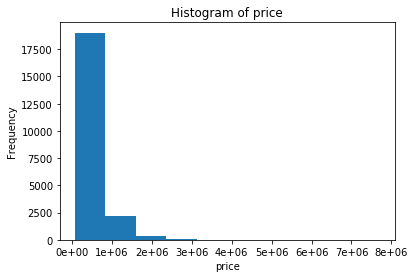

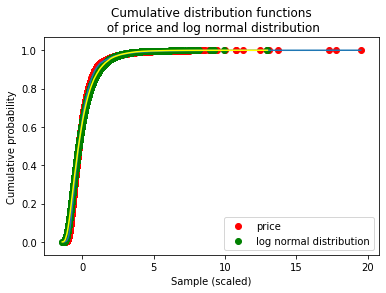

KS-statistic = 0.016111415335924306
P-value = 2.6793301170431634e-05


In [9]:
# test price against lognormal distribution
# plot feature histogram
plot_col('price')

# fit sample to test dist
args = ss.lognorm.fit(price_s) 

# graphically compare CDFs
plot_cums(price_s, scale(ss.lognorm.rvs(args[0], args[1], args[2], size = len(price_s), random_state=123)),
          'price', 'log normal distribution')

# formal test
ks_statisic, pvalue = ss.kstest(rvs=price_s, cdf='lognorm', args=args)
print('KS-statistic = ' + str(ks_statisic))
print('P-value = ' + str(pvalue))

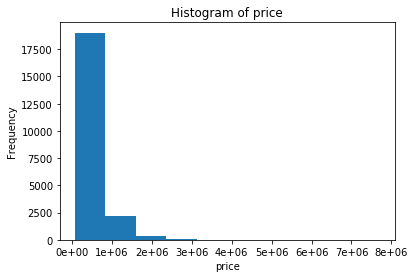

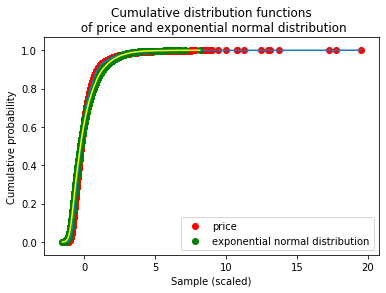

KS-statistic = 0.027461658773721975
P-value = 1.3920340456587736e-14


In [10]:
# test price against exponnorm distribution
# plot feature histogram
plot_col('price')

# fit sample to test dist
args = ss.exponnorm.fit(price_s) 

# graphically compare CDFs
plot_cums(price_s, scale(ss.exponnorm.rvs(args[0], args[1], args[2], size = len(price_s), random_state=123)),
          'price', 'exponential normal distribution')

# formal test
ks_statisic, pvalue = ss.kstest(rvs=price_s, cdf='exponnorm', args=args)
print('KS-statistic = ' + str(ks_statisic))
print('P-value = ' + str(pvalue))

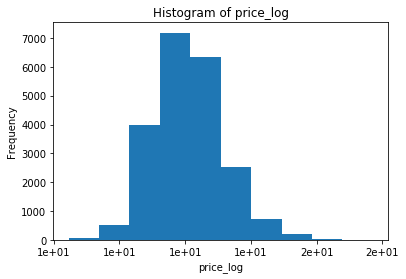

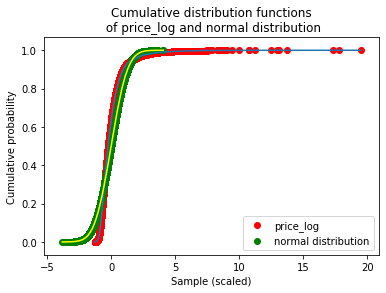

KS-statistic = 0.025988070503969174
P-value = 4.1903563851070804e-13


In [11]:
# test price_log against norm distribution
# plot feature histogram
plot_col('price_log')

# fit sample to test dist
args = ss.norm.fit(price_log_s) 

# graphically compare CDFs
plot_cums(price_s, scale(ss.norm.rvs(args[0], args[1], size = len(price_log_s), random_state=123)),
          'price_log', 'normal distribution')

# formal test
ks_statisic, pvalue = ss.kstest(rvs=price_log_s, cdf='norm', args=args)
print('KS-statistic = ' + str(ks_statisic))
print('P-value = ' + str(pvalue))

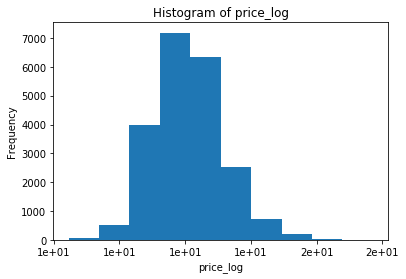

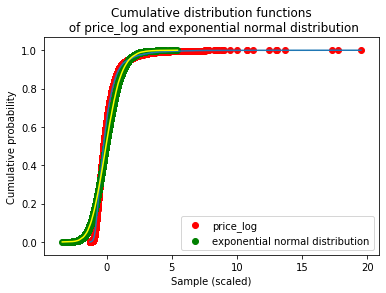

KS-statistic = 0.012802990324212504
P-value = 0.0016743837425996005


In [12]:
# test price_log against exponnorm distribution
# plot feature histogram
plot_col('price_log')

# fit sample to test dist
args = ss.exponnorm.fit(price_log_s) 

# graphically compare CDFs
plot_cums(price_s, scale(ss.exponnorm.rvs(args[0], args[1], args[2], size = len(price_log_s), random_state=123)),
          'price_log', 'exponential normal distribution')

# formal test
ks_statisic, pvalue = ss.kstest(rvs=price_log_s, cdf='exponnorm', args=args)
print('KS-statistic = ' + str(ks_statisic))
print('P-value = ' + str(pvalue))

<b>Conclusion</b>: while a likely distribution was not found, these results suggest that the distribution of price is not lognormal and not exponential normal. Furthermore, the distribution of price_log is not normal and not exponential normal. 

##### Identify a likely distribution for sqft_living

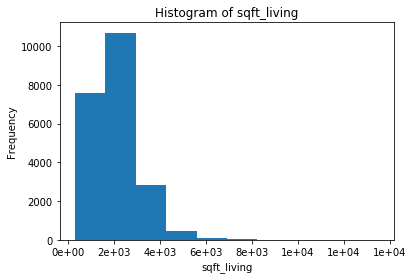

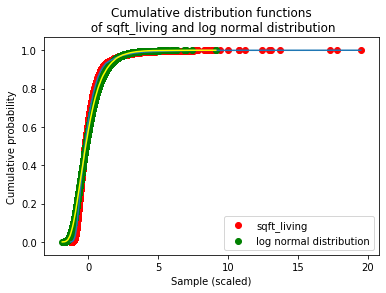

KS-statistic = 0.010117589848217201
P-value = 0.023951818843576785


In [13]:
# test sqft_living against lognorm distribution
# plot feature histogram
plot_col('sqft_living')

# fit sample to test dist
args = ss.lognorm.fit(sqft_living_s) 

# graphically compare CDFs
plot_cums(price_s, scale(ss.lognorm.rvs(args[0], args[1], args[2], size = len(sqft_living_s), random_state=123)),
          'sqft_living', 'log normal distribution')

# formal test
ks_statisic, pvalue = ss.kstest(rvs=sqft_living_s, cdf='lognorm', args=args)
print('KS-statistic = ' + str(ks_statisic))
print('P-value = ' + str(pvalue))

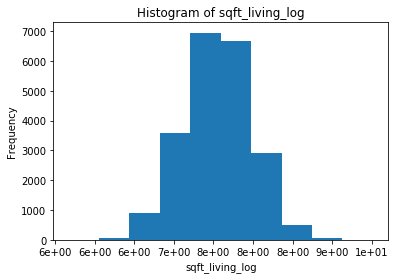

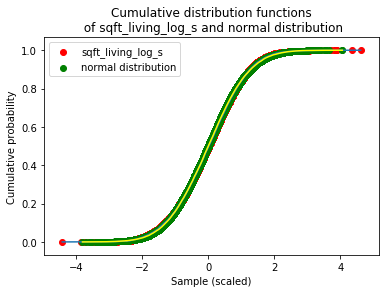

KS-statistic = 0.011441260048272617
P-value = 0.006976266675346063


In [14]:
# test sqft_living_log against norm distribution
# plot feature histogram
plot_col('sqft_living_log')

# fit sample to test dist
args = ss.norm.fit(sqft_living_log_s) 

# graphically compare CDFs
plot_cums(sqft_living_log_s, scale(ss.norm.rvs(args[0], args[1], size = len(sqft_living_log_s), random_state=123)),
          'sqft_living_log_s', 'normal distribution')

# formal test
ks_statisic, pvalue = ss.kstest(rvs=sqft_living_log_s, cdf='norm', args=args)
print('KS-statistic = ' + str(ks_statisic))
print('P-value = ' + str(pvalue))

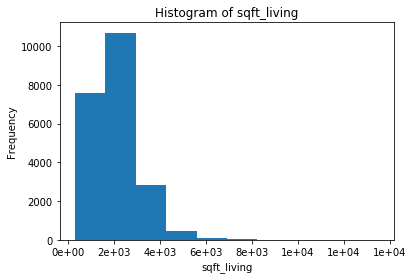

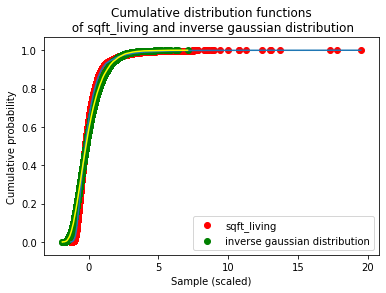

KS-statistic = 0.008226061646173344
P-value = 0.10731055793089662


In [15]:
# test sqft_living against invgauss distribution
# plot feature histogram
plot_col('sqft_living')

# fit sample to test dist
args = ss.invgauss.fit(sqft_living_s) 

# graphically compare CDFs
plot_cums(price_s, scale(ss.invgauss.rvs(args[0], args[1], args[2], size = len(sqft_living_s), random_state=123)),
          'sqft_living', 'inverse gaussian distribution')

# formal test
ks_statisic, pvalue = ss.kstest(rvs=sqft_living_s, cdf='invgauss', args=args)
print('KS-statistic = ' + str(ks_statisic))
print('P-value = ' + str(pvalue))

<b>Conclusion:</b> these results suggest that the distribution of sqft_living is not log normal (although it looked close, p=0.02) and not normal. <br>
A likely distribution for sqft_living is inverse guassian distribution. 

##### Identify a likely distribution for sqft_above

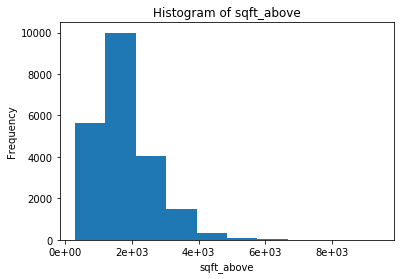

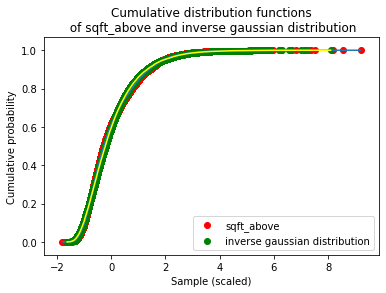

KS-statistic = 0.028867438812603452
P-value = 4.540459844944879e-16


In [16]:
# sqft_above = sqft_living - sqft_basement
# test sqft_living against invgauss distribution (a likely distribution for sqft_living as tested above)
# plot feature histogram
plot_col('sqft_above')

# fit sample to test dist
args = ss.invgauss.fit(sqft_above_s) 

# graphically compare CDFs
plot_cums(sqft_above_s, scale(ss.invgauss.rvs(args[0], args[1], args[2], size = len(sqft_above_s), random_state=123)),
          'sqft_above', 'inverse gaussian distribution')

# formal test
ks_statisic, pvalue = ss.kstest(rvs=sqft_above_s, cdf='invgauss', args=args)
print('KS-statistic = ' + str(ks_statisic))
print('P-value = ' + str(pvalue))

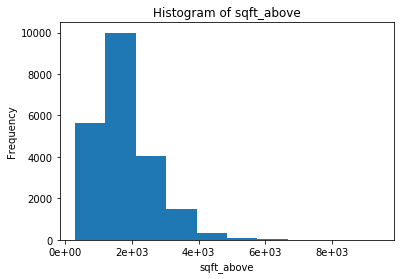

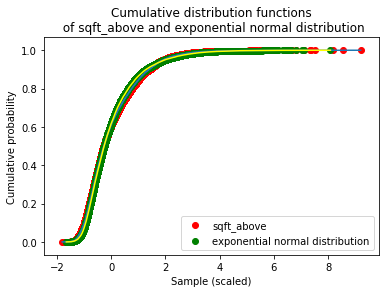

KS-statistic = 0.021585656616913584
P-value = 3.5810851544354597e-09


In [17]:
# test sqft_living against exponnorm distribution 
# plot feature histogram
plot_col('sqft_above')

# fit sample to test dist
args = ss.exponnorm.fit(sqft_above_s) 

# graphically compare CDFs
plot_cums(sqft_above_s, scale(ss.exponnorm.rvs(args[0], args[1], args[2], size = len(sqft_above_s), random_state=123)),
          'sqft_above', 'exponential normal distribution')

# formal test
ks_statisic, pvalue = ss.kstest(rvs=sqft_above_s, cdf='exponnorm', args=args)
print('KS-statistic = ' + str(ks_statisic))
print('P-value = ' + str(pvalue))

<b>Conclusion</b>: while a likely distribution was not found, these results suggest that distribution of sqft_above is not inverse guassian and not exponential normal.

##### Identify a likely distribution for yr_built

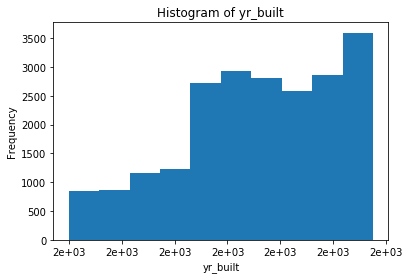

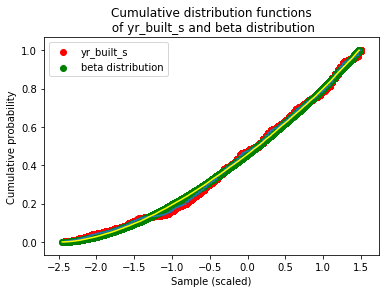

KS-statistic = 0.04185104463242098
P-value = 2.631849208374021e-33


In [18]:
# test yr_built against beta distribution 
# plot feature histogram
plot_col('yr_built')

# fit sample to test dist
args = ss.beta.fit(yr_built_s) 

# graphically compare CDFs
plot_cums(yr_built_s, scale(ss.beta.rvs(args[0], args[1], args[2], args[3], size = len(yr_built_s), random_state=123)),
          'yr_built_s', 'beta distribution')

# formal test
ks_statisic, pvalue = ss.kstest(rvs=yr_built_s, cdf='beta', args=args)
print('KS-statistic = ' + str(ks_statisic))
print('P-value = ' + str(pvalue))

<b>Conclusion</b>: while a likely distribution was not found, these results suggest that distribution of yr_built is not beta.

##### Identify a likely distribution for long

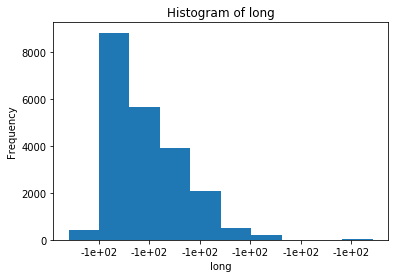

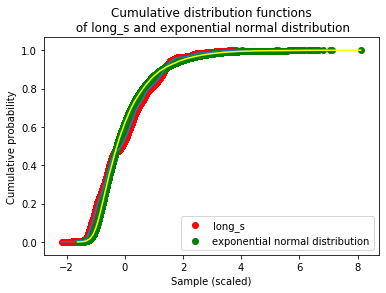

KS-statistic = 0.09003893861101087
P-value = 1.28717115045224e-152


In [19]:
# test long against exponnorm distribution 
# plot feature histogram
plot_col('long')

# fit sample to test dist
args = ss.exponnorm.fit(long_s) 

# graphically compare CDFs
plot_cums(long_s, scale(ss.exponnorm.rvs(args[0], args[1], args[2], size = len(long_s), random_state=123)),
          'long_s', 'exponential normal distribution')

# formal test
ks_statisic, pvalue = ss.kstest(rvs=long_s, cdf='exponnorm', args=args)
print('KS-statistic = ' + str(ks_statisic))
print('P-value = ' + str(pvalue))

<b>Conclusion</b>: while a likely distribution was not found, these results suggest that distribution of long is not exponential normal.

### 3. compute basic summary statistics by both classical, bootstrap, and Bayesian methods;
### 4. compute confidence intervals for the above summary statistics by classical, bootstrap, and Bayesian methods;

##### Classical method

In [20]:
# quick look at summary statistics
cols = ['price', 'sqft_living', 'sqft_above', 'yr_built', 'long']
house[cols].describe()

,price,sqft_living,sqft_above,yr_built,long
count,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,2079.899736,1788.390691,1971.005136,-122.213896
std,3.671272e+05,918.440897,828.090978,29.373411,0.140828
min,7.500000e+04,290.000000,290.000000,1900.000000,-122.519000
25%,3.219500e+05,1427.000000,1190.000000,1951.000000,-122.328000
50%,4.500000e+05,1910.000000,1560.000000,1975.000000,-122.230000
75%,6.450000e+05,2550.000000,2210.000000,1997.000000,-122.125000
max,7.700000e+06,13540.000000,9410.000000,2015.000000,-121.315000


In [21]:
# 95% confidence interval
# Assuming the data is being considered a population, and with sample size > 20000, use z-score
price_classical_ci = ws.DescrStatsW(house['price']).zconfint_mean(alpha=0.05, alternative='two-sided')
sqft_living_classical_ci = ws.DescrStatsW(house['sqft_living']).zconfint_mean(alpha=0.05, alternative='two-sided')
sqft_above_classical_ci = ws.DescrStatsW(house['sqft_above']).zconfint_mean(alpha=0.05, alternative='two-sided')
yr_built_classical_ci = ws.DescrStatsW(house['yr_built']).zconfint_mean(alpha=0.05, alternative='two-sided')
long_classical_ci = ws.DescrStatsW(house['long']).zconfint_mean(alpha=0.05, alternative='two-sided')

In [22]:
# display dataframe (mean, standard deviation, 95% confidence interval for mean)
pd.DataFrame({'mean':np.mean(house[cols]), 'standard deviation':np.std(house[cols]),
             '95% conf int for mean':[price_classical_ci, sqft_living_classical_ci, sqft_above_classical_ci,
                                     yr_built_classical_ci, long_classical_ci]})

,mean,standard deviation,95% conf int for mean
price,540088.141767,367118.703181,"(535193.6554108728, 544982.628122186)"
sqft_living,2079.899736,918.419649,"(2067.655215890687, 2092.1442566489877)"
sqft_above,1788.390691,828.071820,"(1777.3507023855923, 1799.430679190311)"
yr_built,1971.005136,29.372731,"(1970.6135337597807, 1971.396737836018)"
long,-122.213896,0.140825,"(-122.21577390790743, -122.21201890197555)"


##### Bootstrap method: bootstrap the means using 1000 bootstrap samples
(since the CLT only applies to sample means and not medians or any other statistic)

In [23]:
# function to bootstrap the means using 1000 bootstrap samples
def bootstrap_mean(col, n_replicas=1000):
    return pd.Series([house[col].sample(frac=1, replace=True).mean()
    for i in range(n_replicas)])

# bootstrap the means
price_bootstrap_means = bootstrap_mean('price')
sqft_living_bootstrap_means = bootstrap_mean('sqft_living')
sqft_above_bootstrap_means = bootstrap_mean('sqft_above')
yr_built_bootstrap_means = bootstrap_mean('yr_built')
long_bootstrap_means = bootstrap_mean('long')

# display dataframe (mean, standard error, and 95% confidence interval for mean)
pd.DataFrame({'mean':[np.mean(price_bootstrap_means), np.mean(sqft_living_bootstrap_means), np.mean(sqft_above_bootstrap_means), 
                      np.mean(yr_built_bootstrap_means), np.mean(long_bootstrap_means)],
 'standard error':[np.std(price_bootstrap_means), np.std(sqft_living_bootstrap_means), np.std(sqft_above_bootstrap_means), 
                   np.std(yr_built_bootstrap_means), np.std(long_bootstrap_means)],
              '95% conf int for mean': [(np.percentile(np.sort(price_bootstrap_means), 5/2), np.percentile(np.sort(price_bootstrap_means), 100-5/2)),
                                        (np.percentile(np.sort(sqft_living_bootstrap_means), 5/2), np.percentile(np.sort(sqft_living_bootstrap_means), 100-5/2)),
                                        (np.percentile(np.sort(sqft_above_bootstrap_means), 5/2), np.percentile(np.sort(sqft_above_bootstrap_means), 100-5/2)),
                                        (np.percentile(np.sort(yr_built_bootstrap_means), 5/2), np.percentile(np.sort(yr_built_bootstrap_means), 100-5/2)),
                                        (np.percentile(np.sort(long_bootstrap_means), 5/2), np.percentile(np.sort(long_bootstrap_means), 100-5/2))
                                       ]},
             index=['price', 'sqft_living', 'sqft_above', 'yr_built', 'long'])

,mean,standard error,95% conf int for mean
price,540064.196018,2551.544866,"(534915.0703396105, 545145.8237970202)"
sqft_living,2079.780186,6.275366,"(2066.6278316291123, 2091.8647735159398)"
sqft_above,1788.373317,5.780522,"(1777.050329662703, 1799.9496980983665)"
yr_built,1970.999936,0.207363,"(1970.5772625271827, 1971.4260283162912)"
long,-122.213949,0.000972,"(-122.21593522879749, -122.21206554272891)"


##### Bayesian method

In [24]:
# Bayesian confidence intervals for the mean, var, and std using bayes_mvs
price_bayesian_ci = ss.bayes_mvs(house['price'], alpha=0.95)
sqft_living_bayesian_ci = ss.bayes_mvs(house['sqft_living'], alpha=0.95)
sqft_above_bayesian_ci = ss.bayes_mvs(house['sqft_above'], alpha=0.95)
yr_built_bayesian_ci = ss.bayes_mvs(house['yr_built'], alpha=0.95)
long_bayesian_ci = ss.bayes_mvs(house['long'], alpha=0.95)

In [25]:
# display dataframe (mean, standard deviation, 95% Bayesian conf int/credible interval for mean)
pd.DataFrame({'mean':[price_bayesian_ci[0][0], sqft_living_bayesian_ci[0][0], sqft_above_bayesian_ci[0][0], 
                      yr_built_bayesian_ci[0][0], long_bayesian_ci[0][0]],
             'standard deviation':[price_bayesian_ci[2][0], sqft_living_bayesian_ci[2][0], sqft_above_bayesian_ci[2][0], 
                                   yr_built_bayesian_ci[2][0], long_bayesian_ci[2][0]],
             '95% Bayesian conf int/credible interval for mean':[price_bayesian_ci[0][1], sqft_living_bayesian_ci[0][1], sqft_above_bayesian_ci[0][1], 
                                                                 yr_built_bayesian_ci[0][1], long_bayesian_ci[0][1]]},
            index=['price', 'sqft_living', 'sqft_above', 'yr_built', 'long'])

,mean,standard deviation,95% Bayesian conf int/credible interval for mean
price,540088.141767,367118.703181,"(535193.76864233, 544982.5148907289)"
sqft_living,2079.899736,918.419649,"(2067.6554991614507, 2092.143973378224)"
sqft_above,1788.390691,828.071820,"(1777.3509577901198, 1799.4304237857834)"
yr_built,1971.005136,29.372731,"(1970.6135428192952, 1971.3967287765036)"
long,-122.213896,0.140825,"(-122.21577386447234, -122.21201894541059)"


### 5.  leverage confidence intervals in performing hypothesis tests to determine if the differences in pairs and multiple populations are significant

In [26]:
# plot boxplot to graphically explore the differences 
# between column 1 conditioned by column 2, plot groups with >= 100 observations
def make_boxplot(col1, col2, nobs=100, figsz=(6,4)):
    import seaborn as sns
    print('breakdown:')
    print(house[col2].value_counts())

    subset = house[col2].value_counts()[house[col2].value_counts()>=nobs].index
    house_plot = house[house[col2].isin(subset)]

    fig, ax = plt.subplots()
    sns.boxplot(x=col2, y=col1, data=house_plot, ax=ax)
    plt.title('{} conditioned by {}'.format(col1, col2))
    plt.show()

##### Hypothesis test 1


Determine whether multiple populations of <b>price</b> conditioned by <b>view</b> are significant by ANOVA and Tukey's HSD<br>
Here, to make sure there is sufficient data for each category, symboling categories with less than 100 observations were dropped.

breakdown:
0    19489
2      963
3      510
1      332
4      319
Name: view, dtype: int64


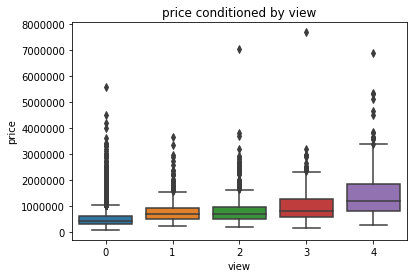

F statistic = 1092.688222523648
P-value = 0.0


      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
group1 group2   meandiff  p-adj     lower       upper     reject
----------------------------------------------------------------
     0      1 315716.6452  0.001 265158.0005    366275.29   True
     0      2 295836.6957  0.001 265681.8971  325991.4944   True
     0      3 475401.0824  0.001  434425.915  516376.2498   True
     0      4 967147.0461  0.001 915585.4139 1018708.6784   True
     1      2 -19879.9495 0.8759 -78016.4869   38256.5879  False
     1      3 159684.4372  0.001  95267.7511  224101.1232   True
     1      4 651430.4009  0.001 579812.3374  723048.4643   True
     2      3 179564.3867  0.001  129537.946  229590.8273   True
     2      4 671310.3504  0.001 612299.4841  730321.2167   True
     3      4 491745.9637  0.001 426539.1021  556952.8254   True
----------------------------------------------------------------


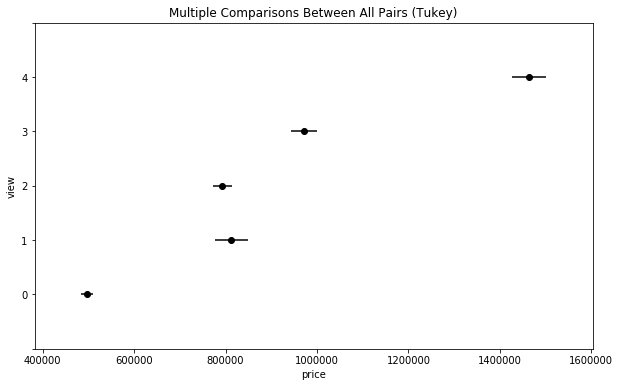

In [27]:
# plot price conditioned by view
make_boxplot('price', 'view')

# get groups of price conditioned by view
v0 = house.groupby('view').get_group(0)['price']
v1 = house.groupby('view').get_group(1)['price']
v2 = house.groupby('view').get_group(2)['price']
v3 = house.groupby('view').get_group(3)['price']
v4 = house.groupby('view').get_group(4)['price']

# ANOVA
f_statistic, p_value = ss.f_oneway(v0, v1, v2, v3, v4)
print('F statistic = ' + str(f_statistic))
print('P-value = ' + str(p_value))

print('\n')
# Tukey's HSD
df = pd.DataFrame({'vals': np.concatenate((v0, v1, v2, v3, v4)).flatten(),
                   'group_num': ['0']*len(v0)+['1']*len(v1)+['2']*len(v2)+
                   ['3']*len(v3)+['4']*len(v4)})
Tukey_HSD = pairwise_tukeyhsd(df.vals, df.group_num)
print(Tukey_HSD)

g = Tukey_HSD.plot_simultaneous();
g.gca().set_xlabel('price');
g.gca().set_ylabel('view');

<b>Results:</b>
<br>
From ANOVA: the F statistic is large and the p-value is small. We can reject the null hypothesis that the variables have the same mean, as the probability of the differences arising from random chance is low.</li>
<p>
From Tukey's HSD test, all pairs, except for view=1 and view=2, are statistically different at the 95% confidence level.

##### Hypothesis test 2


Determine whether multiple populations of <b>sqft_living</b> conditioned by <b>grade</b> are significant by ANOVA and Tukey's HSD<br>
Here, to make sure there is sufficient data for each category, symboling categories with less than 100 observations were dropped.

breakdown:
7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: grade, dtype: int64


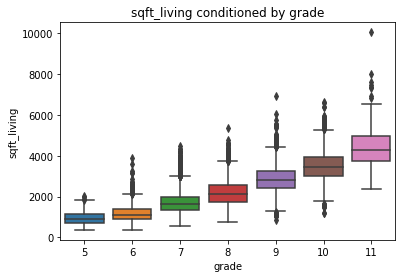

F statistic = 4807.009556796127
P-value = 0.0


    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff  p-adj   lower      upper    reject
-----------------------------------------------------------
    10     11   875.1488 0.001   776.9218   973.3758   True
    10      5 -2536.9734 0.001 -2656.4679 -2417.4789   True
    10      6 -2328.7385 0.001 -2391.2573 -2266.2197   True
    10      7 -1830.8994 0.001 -1884.0817 -1777.7171   True
    10      8 -1335.5513 0.001  -1390.146 -1280.9567   True
    10      9  -652.1599 0.001  -712.1622  -592.1575   True
    11      5 -3412.1222 0.001 -3549.6174 -3274.6269   True
    11      6 -3203.8873 0.001 -3296.2703 -3111.5043   True
    11      7 -2706.0482 0.001 -2792.3869 -2619.7095   True
    11      8 -2210.7001 0.001 -2297.9159 -2123.4843   True
    11      9 -1527.3087 0.001 -1618.0076 -1436.6097   True
     5      6   208.2349 0.001     93.496   322.9737   True
     5      7    706.074 0.001   596.1433   816.0046

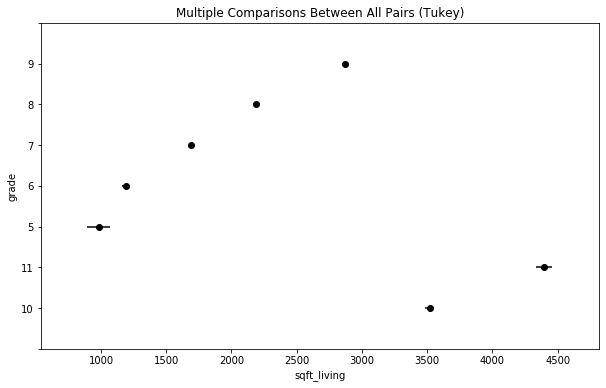

In [28]:
# plot sqft_living conditioned by grade
make_boxplot('sqft_living', 'grade')

# get groups of sqft_living conditioned by grade
g5 = house.groupby('grade').get_group(5)['sqft_living']
g6 = house.groupby('grade').get_group(6)['sqft_living']
g7 = house.groupby('grade').get_group(7)['sqft_living']
g8 = house.groupby('grade').get_group(8)['sqft_living']
g9 = house.groupby('grade').get_group(9)['sqft_living']
g10 = house.groupby('grade').get_group(10)['sqft_living']
g11 = house.groupby('grade').get_group(11)['sqft_living']

# ANOVA
f_statistic, p_value = ss.f_oneway(g5, g6, g7, g8, g9, g10, g11)
print('F statistic = ' + str(f_statistic))
print('P-value = ' + str(p_value))

print('\n')
# Tukey's HSD
df = pd.DataFrame({'vals': np.concatenate((g5, g6, g7, g8, g9, g10, g11)).flatten(),
                   'group_num': ['5']*len(g5)+['6']*len(g6)+['7']*len(g7)+
                   ['8']*len(g8)+['9']*len(g9)+['10']*len(g10)+['11']*len(g11)})
Tukey_HSD = pairwise_tukeyhsd(df.vals, df.group_num)
print(Tukey_HSD)

g = Tukey_HSD.plot_simultaneous();
g.gca().set_xlabel('sqft_living');
g.gca().set_ylabel('grade');

<b>Results:</b>
<br>
From ANOVA: the F statistic is large and the p-value is small. We can reject the null hypothesis that the variables have the same mean, as the probability of the differences arising from random chance is low.</li>
<p>
From Tukey's HSD test, all pairs are statistically different at the 95% confidence level.

##### Hypothesis test 3
Determine whether difference in pairs of <b>price</b> conditioned by <b>waterfront</b> are significant by <b>Bootstrapping</b>

Group 1: waterfront = 0<br>
Group 2: waterfront = 1<br>
<b>Hypothesis test</b>: Does the confidence interval of the diffrence in means cover zero? Significantly different if (lower CI>0) or (upper CI<0), in which case we reject the null hypothesis that the two samples were drawn from the same population distribution.<br>

breakdown:
0    21450
1      163
Name: waterfront, dtype: int64


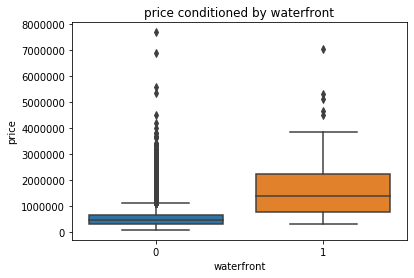

In [29]:
# boxplot of price conditioned by waterfront
make_boxplot('price', 'waterfront')

In [30]:
# bootstrap price for waterfront = 0 and waterfront = 1 groups
n_replicas = 1000
diffs = []
for i in range(n_replicas):
    sample = house.sample(frac=1.0, replace=True)
    w0_sample_mean = sample[sample['waterfront'] == 0]['price'].mean()
    w1_sample_mean = sample[sample['waterfront'] == 1]['price'].mean()
    diffs.append(w0_sample_mean - w1_sample_mean)
diffs = pd.Series(diffs)

In [31]:
# Plot the distribution and mark the mean, 95% confidence interval
def plot_hist(x, p=5):
    plt.hist(x, alpha=0.5)
    plt.axvline(x.mean(), label='mean difference in means')
    # 95% confidence interval    
    plt.axvline(np.percentile(x, p/2.), color='red', linewidth=3, label='95% CI')
    plt.axvline(np.percentile(x, 100-p/2.), color='red', linewidth=3)

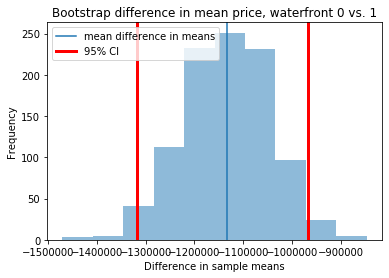

In [32]:
# plot difference in mean + 95% confidence interval
plot_hist(diffs)
plt.title('Bootstrap difference in mean price, waterfront 0 vs. 1')
plt.ylabel('Frequency')
plt.xlabel('Difference in sample means')
plt.legend()
plt.show()

<b>Result</b>: The distribution of the difference in means does not cover zero. We can infer that the means of the two populations are significantly different.

##### Hypothesis test 4
Determine whether difference in pairs of <b>price</b> conditioned by <b>waterfront</b> are significant by <b>Bayesian method</b>

Group 1: waterfront = 0<br>
Group 2: waterfront = 1<br>
<b>Hypothesis test</b>: Reject null hypothesis that the 2 samples were drawn from the same population distribution if the 95% credible intervals do not overlap.

In [33]:
# Bayesian confidence intervals for the mean, var, and std using bayes_mvs
# for waterfront = 0 and waterfront = 1 groups
w0 = house.groupby('waterfront').get_group(0)['price']
w1 = house.groupby('waterfront').get_group(1)['price']

w0_bayesian_ci = ss.bayes_mvs(w0, alpha=0.95)
w1_bayesian_ci = ss.bayes_mvs(w1, alpha=0.95)

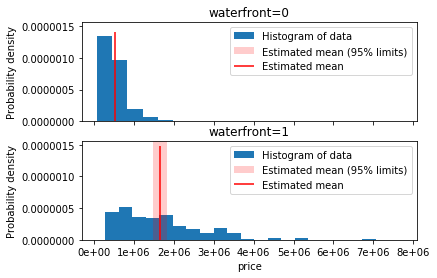

In [34]:
# Plot means and credible intervals
fig, axs = plt.subplots(2,1, sharex=True, sharey=True, figsize=(6,4))
axs[0].hist(w0, bins=20, density=True, label='Histogram of data')
axs[0].vlines(w0_bayesian_ci[0].statistic, axs[0].get_ylim()[0], axs[0].get_ylim()[1], colors='r', label='Estimated mean')
axs[0].axvspan(w0_bayesian_ci[0].minmax[0], w0_bayesian_ci[0].minmax[1], facecolor='r', 
           alpha=0.2, label=r'Estimated mean (95% limits)')
axs[0].legend()
axs[0].set_title('waterfront=0')
axs[0].set_ylabel('Probability density')
axs[1].hist(w1, bins=20, density=True, label='Histogram of data')
axs[1].vlines(w1_bayesian_ci[0].statistic, axs[1].get_ylim()[0], axs[1].get_ylim()[1], colors='r', label='Estimated mean')
axs[1].axvspan(w1_bayesian_ci[0].minmax[0], w1_bayesian_ci[0].minmax[1], facecolor='r', 
           alpha=0.2, label=r'Estimated mean (95% limits)')
axs[1].legend()
axs[1].set_title('waterfront=1')
axs[1].xaxis.set_major_formatter(mtick.FormatStrFormatter('%.0e'))
axs[1].set_ylabel('Probability density')
axs[1].set_xlabel('price')
plt.show()

<b>Results:</b> Reject null hypothesis that the 2 samples were drawn from the same population distribution as the 95% credible intervals do not overlap.

##### Hypothesis test 5
Determine whether difference in pairs of <b>sqft_living</b> conditioned by <b>zipcode</b> are significant by <b>Bootstrapping</b>


Specifically, from EDA in Milestone 1, the 2 zipcodes with the highest median house prices were Medina, WA 98039 and Bellevue, WA 98004. Are there differences in sqft_living in these 2 zipcodes?

Group 1: zipcode 98039<br>
Group 2: zipcode 98004<br>
<b>Hypothesis test</b>: Does the confidence interval of the diffrence in means cover zero? Significantly different if (lower CI>0) or (upper CI<0), in which case we reject the null hypothesis that the two samples were drawn from the same population distribution.<br>

In [35]:
# bootstrap sqft_living for zipcode = 98039 and zipcode = 98004 groups
# make sure the original sample is of sufficent size
print('# observations for zipcode 98039: '+str(house.groupby('zipcode').get_group(98039)['sqft_living'].count()))
print('# observations for zipcode 98004: '+str(house.groupby('zipcode').get_group(98004)['sqft_living'].count()))

n_replicas = 1000
diffs = []
for i in range(n_replicas):
    sample = house.sample(frac=1.0, replace=True)
    z1_sample_mean = sample[sample['zipcode'] == 98039]['sqft_living'].mean()
    z2_sample_mean = sample[sample['zipcode'] == 98004]['sqft_living'].mean()
    diffs.append(z1_sample_mean - z2_sample_mean)
diffs = pd.Series(diffs)

# observations for zipcode 98039: 50
# observations for zipcode 98004: 317


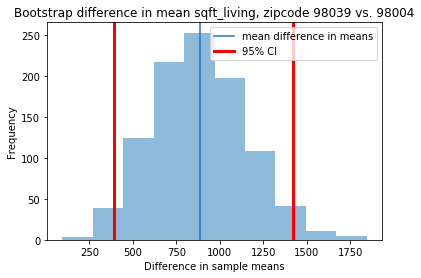

In [36]:
# plot difference in mean + 95% confidence interval
plot_hist(diffs)
plt.title('Bootstrap difference in mean sqft_living, zipcode 98039 vs. 98004')
plt.ylabel('Frequency')
plt.xlabel('Difference in sample means')
plt.legend()
plt.show()

<b>Result</b>: The distribution of the difference in means does not cover zero. We can infer that the means of the two populations are significantly different.

##### Hypothesis test 6
Determine whether difference in pairs of <b>sqft_living</b> conditioned by <b>zipcode</b> are significant by <b>Bayesian method</b>

Group 1: zipcode 98039<br>
Group 2: zipcode 98004<br>
<b>Hypothesis test</b>: Reject null hypothesis that the 2 samples were drawn from the same population distribution if the 95% credible intervals do not overlap.

In [37]:
# Bayesian confidence intervals for the mean, var, and std using bayes_mvs
# for zipcode = 98039 and zipcode = 98004 groups
z1 = house.groupby('zipcode').get_group(98039)['sqft_living']
z2 = house.groupby('zipcode').get_group(98004)['sqft_living']

z1_bayesian_ci = ss.bayes_mvs(z1, alpha=0.95)
z2_bayesian_ci = ss.bayes_mvs(z2, alpha=0.95)

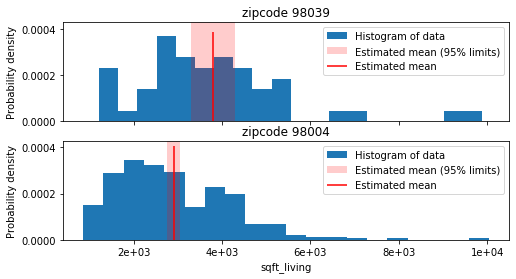

In [38]:
# Plot means and credible intervals
fig, axs = plt.subplots(2,1, sharex=True, sharey=True, figsize=(8,4))
axs[0].hist(z1, bins=20, density=True, label='Histogram of data')
axs[0].vlines(z1_bayesian_ci[0].statistic, axs[0].get_ylim()[0], axs[0].get_ylim()[1], colors='r', label='Estimated mean')
axs[0].axvspan(z1_bayesian_ci[0].minmax[0], z1_bayesian_ci[0].minmax[1], facecolor='r', 
           alpha=0.2, label=r'Estimated mean (95% limits)')
axs[0].legend()
axs[0].set_title('zipcode 98039')
axs[0].set_ylabel('Probability density')
axs[1].hist(z2, bins=20, density=True, label='Histogram of data')
axs[1].vlines(z2_bayesian_ci[0].statistic, axs[1].get_ylim()[0], axs[1].get_ylim()[1], colors='r', label='Estimated mean')
axs[1].axvspan(z2_bayesian_ci[0].minmax[0], z2_bayesian_ci[0].minmax[1], facecolor='r', 
           alpha=0.2, label=r'Estimated mean (95% limits)')
axs[1].legend()
axs[1].set_title('zipcode 98004')
axs[1].xaxis.set_major_formatter(mtick.FormatStrFormatter('%.0e'))
axs[1].set_ylabel('Probability density')
axs[1].set_xlabel('sqft_living')
plt.show()

<b>Results:</b> Reject null hypothesis that the 2 samples were drawn from the same population distribution as the 95% credible intervals do not overlap.

#### Overall summary: 
Using the King County House dataset, likely distributions were tested for several variables, summary statistics (e.g. mean, standard deviation, 95% confidence interval) were computed, and hypothesis tests were performed to determine if the differences in pairs and multiple populations are significant.